In [3]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import geopandas as gpd
import folium
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import show

from datetime import date

import os

## Sentinalsat Package
[Tutorial](https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b)

In [9]:
# Register for an Copernicus Open Access Hub account here: https://scihub.copernicus.eu/dhus/#/self-registration
# Use those credentials here
user = os.getenv('COPERNICUS_USER')
password = os.getenv('COPERNICUS_PASSWORD')
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [206]:
# Generate the GeoJSON file using geojson.io (tutorial here - https://support.planet.com/hc/en-us/articles/360016337117-How-to-create-a-GeoJSON-file)
nReserve = gpd.read_file('mount_semeru.geojson')
# Map visual
m = folium.Map([-8.051992, 112.997656], zoom_start=9)
folium.GeoJson(nReserve).add_to(m)
m

In [237]:
# Query API specifying parameters
footprint = geojson_to_wkt(read_geojson('mount_semeru.geojson'))
products = api.query(footprint,
                     date=('20211001', '20211225'),
                     platformname='Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage=(0,40))

In [238]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
8d6a4963-592a-47aa-97a2-e41563328f9b,S2A_MSIL2A_20211012T022631_N0301_R046_T49MFM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-12T02:26:31.024Z, Instrument: MS...",false,2021-10-12 07:00:09,2021-10-12 02:26:31.024,2021-10-12 02:26:31.024,2021-10-12 12:41:55.710,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS1_20211012T070009_S2021...,S2A_OPER_MSI_L2A_TL_VGS1_20211012T070009_A0329...,S2A_MSIL2A_20211012T022631_N0301_R046_T49MFM_2...,8d6a4963-592a-47aa-97a2-e41563328f9b,"MULTIPOLYGON (((112.36861 -8.22786, 112.90455 ..."
719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9,S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-12-16T02:31:09.024Z, Instrument: MS...",false,2021-12-16 04:49:08,2021-12-16 02:31:09.024,2021-12-16 02:31:09.024,2021-12-16 06:38:58.739,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS1_20211216T044908_S2021...,S2B_OPER_MSI_L2A_TL_VGS1_20211216T044908_A0249...,S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_2...,719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9,"MULTIPOLYGON (((112.85483 -9.13042, 113.81809 ..."
2e3b57a9-00aa-4fd8-8baa-b1db7c980aa4,S2A_MSIL2A_20211012T022631_N0301_R046_T49LFL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-12T02:26:31.024Z, Instrument: MS...",false,2021-10-12 07:00:09,2021-10-12 02:26:31.024,2021-10-12 02:26:31.024,2021-10-12 12:40:58.528,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS1_20211012T070009_S2021...,S2A_OPER_MSI_L2A_TL_VGS1_20211012T070009_A0329...,S2A_MSIL2A_20211012T022631_N0301_R046_T49LFL_2...,2e3b57a9-00aa-4fd8-8baa-b1db7c980aa4,"MULTIPOLYGON (((112.56102 -9.13154, 112.90912 ..."
c40cac61-c75a-4015-8d0b-cb0516e9d384,S2A_MSIL2A_20211012T022631_N0301_R046_T49MGM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-12T02:26:31.024Z, Instrument: MS...",false,2021-10-12 07:00:09,2021-10-12 02:26:31.024,2021-10-12 02:26:31.024,2021-10-12 12:43:57.927,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS1_20211012T070009_S2021...,S2A_OPER_MSI_L2A_TL_VGS1_20211012T070009_A0329...,S2A_MSIL2A_20211012T022631_N0301_R046_T49MGM_2...,c40cac61-c75a-4015-8d0b-cb0516e9d384,"MULTIPOLYGON (((112.81525 -8.22640, 113.81135 ..."
d2df89c7-8df7-474c-8593-08d8fc71d799,S2A_MSIL2A_20211012T022631_N0301_R046_T49LGL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-12T02:26:31.024Z, Instrument: MS...",false,2021-10-12 07:00:09,2021-10-12 02:26:31.024,2021-10-12 02:26:31.024,2021-10-12 12:40:39.103,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS1_20211012T070009_S2021...,S2A_OPER_MSI_L2A_TL_VGS1_20211012T070009_A0329...,S2A_MSIL2A_20211012T022631_N0301_R046_T49LGL_2...,d2df89c7-8df7-474c-8593-08d8fc71d799,"MULTIPOLYGON (((112.81961 -9.13065, 113.81809 ..."
0879f3aa-6448-407f-bcc2-b4a68d864214,S2B_MSIL2A_20211017T022659_N0301_R046_T49LGL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-10-17T02:26:59.024Z, Instrument: MS...",false,2021-10-17 05:16:56,2021-10-17 02:26:59.

In [222]:
# download by index
image_id = '719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9'
api.download(image_id)

MD5 checksumming:   0%|          | 0.00/881M [00:00<?, ?B/s]

{'id': '719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9',
 'title': 'S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_20211216T044908',
 'size': 881401493,
 'md5': '489456bc8fded5a0aaaf7cb54c58b7ea',
 'date': datetime.datetime(2021, 12, 16, 2, 31, 9, 24000),
 'footprint': 'POLYGON((112.85482836091535 -9.130420505524445,112.81957176090572 -9.12351732891643,112.81485461372768 -8.137978067422997,113.81073385734211 -8.132306258990736,113.8180854097709 -9.124270961723694,112.85482836091535 -9.130420505524445))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 12, 16, 6, 39, 6, 106000),
 'Ingestion Date': datetime.datetime(2021, 12, 16, 6, 38, 58, 739000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('719214b1-b2a5-45d7-94ec-9dcc2a2e3cc9')/Products('Quicklook')/$value",
 'path': 'S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_20211216T044908.zip',
 'downloaded_byt

In [239]:
# Open Bands 4, 3 and 2 with Rasterio
# set path to bands 2,3,4 images
path = 'S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_20211216T044908/S2B_MSIL2A_20211216T023109_N0301_R046_T49LGL_20211216T044908.SAFE/GRANULE/L2A_T49LGL_A024954_20211216T024350/IMG_DATA/R10m/'
b4 = rio.open(path + 'T49LGL_20211216T023109_B04_10m.jp2')
b3 = rio.open(path + 'T49LGL_20211216T023109_B03_10m.jp2')
b2 = rio.open(path + 'T49LGL_20211216T023109_B02_10m.jp2')


# Create an RGB image 
with rio.open('semeru2_RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

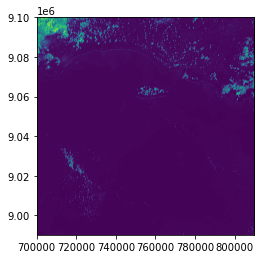

<AxesSubplot:>

In [240]:
fp = r'semeru2_RGB.tiff'
img = rio.open(fp)
show(img)